# Exploratory Analysis

## Imports

##### Insall prerequisites

In [1]:
!pip install sentence_transformers

##### import packages

In [2]:
import os
import time

import IPython
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.tokenize import word_tokenize

from sentence_transformers import SentenceTransformer


from google.colab import drive

##### load NLTK

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##### Load BERT 

In [4]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

##### Using Google Colab files

In [5]:
drive.mount(r'/content/drive/',force_remount=True) 

data_dir = os.getcwd() + '/drive/My Drive/Colab Notebooks/AdvancedML/HW3/'
data_dir

Mounted at /content/drive/


'/content/drive/My Drive/Colab Notebooks/AdvancedML/HW3/'

#### Change Defaults

Disable Warnings 

Disable Autoscrolling

Enable multiple display

<br><br><br>
<br><br><br>
<br><br><br>

# Dataset

#### Load Dataset from Excel file

In [6]:
df = pd.read_excel(data_dir + 'full_articles_10k.xlsx')
df.head()

,title,cord_uid,abstract,body_text
0,Chapter 6 Best practices and approaches using ...,rsgdqk1x,This chapter provides ten practical case studi...,"Throughout the previous chapters, this book ad..."
1,A Comparison: Prediction of Death and Infected...,k58agggx,"COVID-19 is a virus causing pneumonia, also kn...","COVID-19 is a virus causing pneumonia, also kn..."
2,Environmental implication of personal protecti...,ercubdf9,"In the present global health emergency, face m...",Due to the fast development in the domain of c...
3,The first three weeks of lockdown in England: ...,3u446iuy,With the outbreak of COVID-19 being declared a...,The first UK confirmed death from COVID-19 was...
4,Appendix B Climate change and global warming: ...,ora47nlw,Unknown,Climate change and global warming:\nImpacts on...


#### extract relevat features - titles and abstracts

In [7]:
titles = df["title"].tolist()
abstracts = df["abstract"].tolist()

<br><br><br>
<br><br><br>

# Compression - Embedding with BERT
- from text to vector
- use a dimenssion of 768
- keep sementic meaning



In [8]:
%time titles_embeddings = bert_model.encode(titles)

'titles embeddings shape:',titles_embeddings.shape

CPU times: user 8.8 s, sys: 2.93 s, total: 11.7 s
Wall time: 10.6 s


('titles embeddings shape:', (10000, 768))

In [9]:
%time abstracts_embeddings = bert_model.encode(abstracts)

'abstracts embeddings shape:',abstracts_embeddings.shape

CPU times: user 24.7 s, sys: 8.16 s, total: 32.9 s
Wall time: 23.4 s


('abstracts embeddings shape:', (10000, 768))

<br><br><br>
<br><br><br>

# Visualization

#### WordCloud

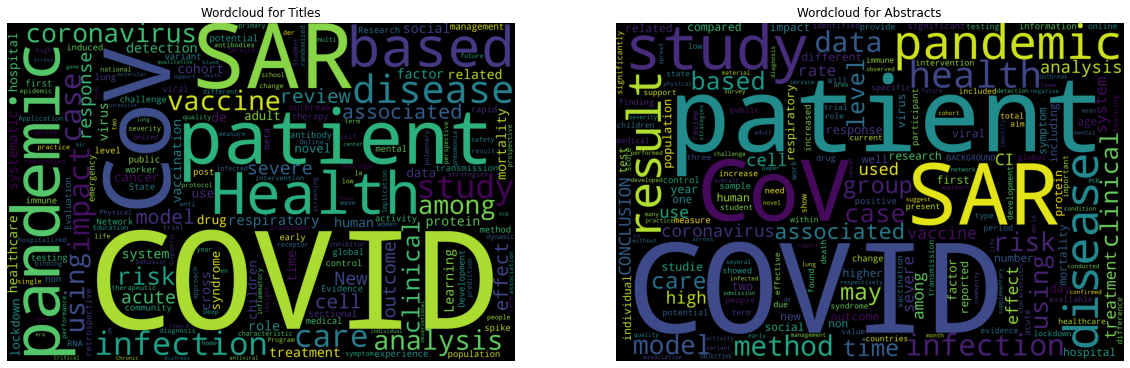

In [10]:
def plot_cloud(list_text,plottitle='',sub_i=0):
    text = "".join(list_text)  
    wordcloud = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(text)
    
    plt.subplot(1,2,sub_i)
    plt.imshow(wordcloud) 
    plt.axis("off");
    plt.title('Wordcloud for ' + plottitle)


plt.figure(figsize=(20, 15))
plot_cloud(titles,'Titles',1)
plot_cloud(abstracts,'Abstracts',2)

#### PCA

Helpers:

In [11]:
def text2pca(sentence_embeddings,n=2):
  pca = PCA(n_components=n)
  pca_result = pca.fit_transform(sentence_embeddings)
  return pca,pca_result 


def plotPCA(pca,results,plottitle='',sub_i=0):
  plt.subplot(1,2,sub_i)
  sns.scatterplot(x=results[:,0], y=results[:,1],legend="full",alpha=0.3,markers='.');
  plt.title(plottitle + ' - with principal components: ' + str(pca.explained_variance_ratio_))

Perform a PCA on the features embeddings

In [12]:
titles_pca, titles_pca_results = text2pca(titles_embeddings)
abstracts_pca, abstracts_pca_results = text2pca(abstracts_embeddings)

Plot 2-components PCA

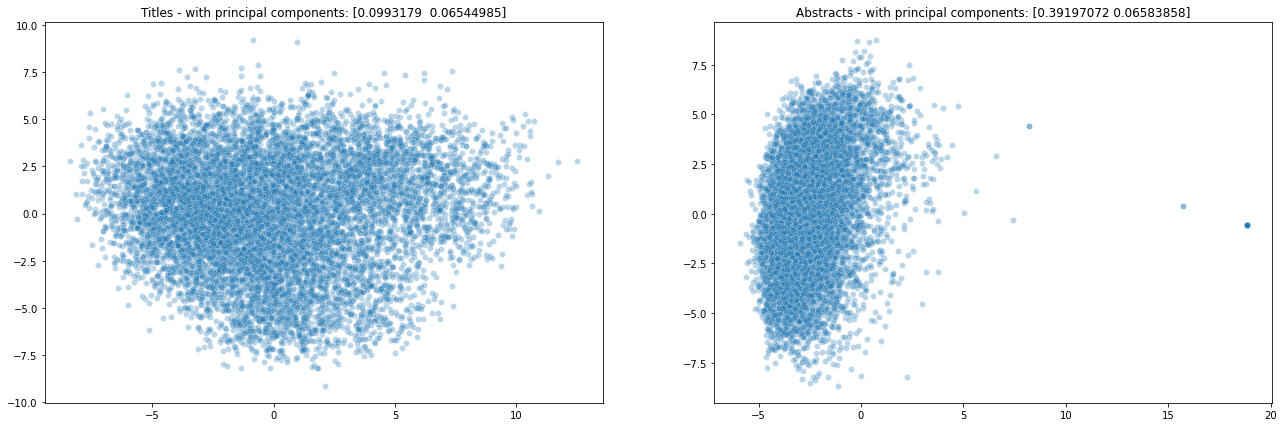

In [13]:
plt.figure(figsize=(22, 7))

plotPCA(titles_pca, titles_pca_results,'Titles',sub_i=1)
plotPCA(abstracts_pca, abstracts_pca_results,'Abstracts',sub_i=2)

#### t-SNE

Helpers:

In [14]:
def text2tsne(sentence_embeddings,n=2,verbose=True):
  tsne = TSNE(n_components=2, verbose=verbose, perplexity=40, n_iter=300)
  tsne_results = tsne.fit_transform(sentence_embeddings)
  return tsne,tsne_results

def plotTNSE(tnse,results,plottitle='',sub_i=0):
  plt.subplot(1,2,sub_i)
  sns.scatterplot(x=results[:,0], y=results[:,1],legend="full",alpha=0.3,markers='.');
  plt.title(plottitle)

Perform t-SNE on the feature embeddings

In [15]:
titles_tsne, titles_tsne_results = text2tsne(titles_embeddings)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.114s...
[t-SNE] Computed neighbors for 10000 samples in 173.535s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.220961
[t-SNE] KL divergence after 50 iterations with early exaggeration: 92.687027
[t-SNE] KL divergence after 300 iterations: 2.909374


In [16]:
abstracts_tsne, abstracts_tsne_results = text2tsne(abstracts_embeddings)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.246s...
[t-SNE] Computed neighbors for 10000 samples in 139.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.236320
[t-SNE] KL divergence after 300 iterations: 3.279310


Plot 2-components t-SNE

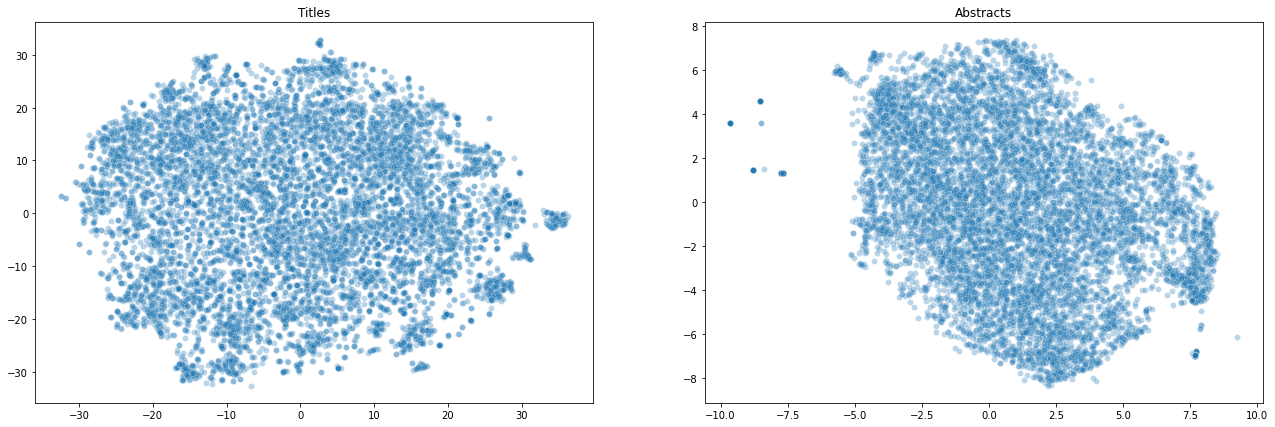

In [18]:
plt.figure(figsize=(22, 7))

plotTNSE(titles_tsne, titles_tsne_results,'Titles',sub_i=1)
plotTNSE(abstracts_tsne, abstracts_tsne_results,'Abstracts',sub_i=2)